# Chapter3. A Tour of Machine Learning <u>Classifiers</u> Using Scikit-learn

Chapter2에서는 Perceptrons와 Adaptive linear neurons을 이용해 간단한 <u>Classification problem</u>을 다뤄보았다. 

Chapter3에서는 <u>Classification problem</u>을 풀 수 있는     
보다 현대적인 방법론들(logistic regression, SVM, K-nearest neighbors, ...)에 대해 간단하게 다뤄보고     
이런 방법들을 Python의 Machine Learning library인 Scikit-learn을 이용해 구현해볼 것이다.

### Choosing a <u>classification algorithm</u>

그것이 Regression problem이든 Classification problem이든 하나의 문제를 푸는 다양한 방법론이 존재한다. 앞서 Chapter2에서 같은 문제를 Perceptrons 혹은 Adaptive linear neurons를 이용해 풀 수 있었다. 이밖에도 다양한 방법론이 존재한다.

다양한 방법론이 있다면 그냥 가장 좋은 것을 사용하면 되지 않은가? 라고 생각할 수도 있다.

하지만 각 방법론마다 데이터에 대한 다른 조건을 가정하고 있고,     
문제를 풀어가는 방식이 조금식 다르기 때문에     
어떤 데이터에는 좋은 방법이 다른 데이터에는 좋지 않을수도 있는 것이다.   
(여기서 다른 데이터라는 것은 변수(feature)의 수가 다르거나 sample수가 다르거나 noise가 다르거나, 변수간의 관계가 다르거나 다양한 상황이 있을 있다.)

따라서 데이터에 따라 좋은 방법을 잘 골라 쓰는 것이 중요하고,      
해당 데이터에 잘 들어 맞는 방법을 고르는 것도 하나의 테크닉이라고 할 수 있다.


### First steps with scikit-learn

다양한 방법론을 소개하면서 이들을 scikit-learn을 이용해 구현해 볼텐데,    

우선 Iris flower 데이터를 Chapter2에서 다뤘던 Perceptrons와 Adaline을 scikit-learn으로 구현해보자.

In [7]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
len(X)
X

array([[ 1.4,  0.2],
       [ 1.4,  0.2],
       [ 1.3,  0.2],
       [ 1.5,  0.2],
       [ 1.4,  0.2],
       [ 1.7,  0.4],
       [ 1.4,  0.3],
       [ 1.5,  0.2],
       [ 1.4,  0.2],
       [ 1.5,  0.1],
       [ 1.5,  0.2],
       [ 1.6,  0.2],
       [ 1.4,  0.1],
       [ 1.1,  0.1],
       [ 1.2,  0.2],
       [ 1.5,  0.4],
       [ 1.3,  0.4],
       [ 1.4,  0.3],
       [ 1.7,  0.3],
       [ 1.5,  0.3],
       [ 1.7,  0.2],
       [ 1.5,  0.4],
       [ 1. ,  0.2],
       [ 1.7,  0.5],
       [ 1.9,  0.2],
       [ 1.6,  0.2],
       [ 1.6,  0.4],
       [ 1.5,  0.2],
       [ 1.4,  0.2],
       [ 1.6,  0.2],
       [ 1.6,  0.2],
       [ 1.5,  0.4],
       [ 1.5,  0.1],
       [ 1.4,  0.2],
       [ 1.5,  0.1],
       [ 1.2,  0.2],
       [ 1.3,  0.2],
       [ 1.5,  0.1],
       [ 1.3,  0.2],
       [ 1.5,  0.2],
       [ 1.3,  0.3],
       [ 1.3,  0.3],
       [ 1.3,  0.2],
       [ 1.6,  0.6],
       [ 1.9,  0.4],
       [ 1.4,  0.3],
       [ 1.6,  0.2],
       [ 1.4,

> 먼저 feature matrix $\mathbf{X}$와 target vector $\mathbf{y}$에 로드 한다.

In [16]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

> 데이터 $[\mathbf{X}:\mathbf{y}]$를 (random하게) training data와 test data로 7:3의 비율로 random하게 나눈다.      

> training data$[\mathbf{X}_{train}:\mathbf{y}_{train}]$는 모형을 학습시키는데 사용되고,         
test data$[\mathbf{X}_{test}:\mathbf{y}_{test}]$는 모형의 성능을 평가하는데 사용된다.          

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

> 최적의 성능을 위해서는 각 feature들을 **feature scaling**을 하며 다양한 기법 중 **standardization**(표준화)의 경우 아래와 같이 각 변수에서 평균($\mu$)을 빼고 표준편차($\sigma$)로 나눠 정규분포 $N(0, 1)$로 변환한다.
$$x^{'}_j = \frac{x_j - \mu_j}{\sigma_j}$$
> 위에서 sc.fit은 training data의 평균과 표준편차를 구하는 과정이고      
sc.transform을 통해 실제 각 변수마다 표준화된 값이 계산된다.

In [18]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

> 이제 데이터를 사용할 준비가 다 되었다.    
Chapter2에는 Perceptrons를 직접 구현 했었는데,   
대신 scikit-learn에 구현되어 있는 것을 사용할 수 있다.   
Chapter2에서 구현한 것과 거의 유사한 형태로 사용하는 것을 확인할 수 있다.

In [19]:
ppn.classes_

array([0, 1, 2])

In [20]:
ppn.coef_

array([[-0.14874662, -0.11229737],
       [ 0.22431308, -0.20230671],
       [ 0.50351128,  0.28717266]])

> 학습한 모형 파라미터는 아래와 같다.    
target이 3가지인 multi-class classification이므로     
One-vs.-Rest의 모형 3가지 사용되어    
weight쌍이 3개 존재함을 알 수 있다.

In [21]:
y_pred = ppn.predict(X_test_std)
print(len(y_pred))
print(y_pred)
print(y_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

45
[2 1 0 2 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 0 0 2 1 0 2 2 0 0
 2 1 1 2 0 2 0 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
Misclassified samples: 4


> 이렇게 (training data로) 학습시킨 Perceptrons 모형을 이용해     
test data에는 어떤 예측을 하는지 살펴보면, 45건중 41건을 잘 예측함을 확인할 수 있다.

> 오분류율(missclassification error rate)이 $4/45 \approx 0.089$임을 알 수 있다.    
혹은 정확도(accuracy)가 $41/45 \approx 0.911$이라고 할 수 있다.

In [22]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


###### Overfitting

앞서 training data를 이용해 모형을 학습시킨 후, test data를 이용해 모형의 예측 정확도를 평가 했었다.

만약 어떤 모형이 training data에는 정말 잘 들어맞는데,     
training data가 아닌 다른 데이터에 대해서는 좋은 예측을 하지 못한다면    
이는 좋은 모형이라고 할 수 없다.    
(비유적으로 100번 풀어본 문제는 항상 잘 맞추는데, 새로운 문제는 잘 못 맞춘다면 이는 좋은 학습이라 할 수 없다.)

이처럼 training data에만 잘 예측 상황을 **overfitting**(과적합)이라 하며 좋은 모형이라 할 수 없다.

반대로 바람직한 상황으로 test data에도 잘 예측하는 모형을 **generalization**(일반화)이 좋은 모형이라 한다.

###### Decision regions

Chapter2에서 했던 것처럼 각 data sample을 잘 분류하는지 살펴보자.

In [23]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
        

    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                   alpha=1.0, linewidth=1, marker='o',
                   s=55, label='test set')
        

In [24]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

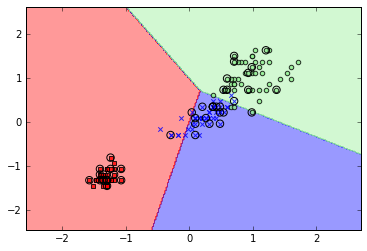

In [25]:
plot_decision_regions(X=X_combined_std,
                     y=y_combined,
                     classifier=ppn,
                     test_idx=range(105,150))

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


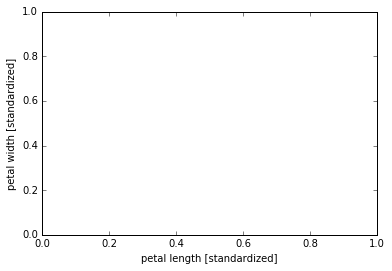

In [26]:
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

### Modeling class probabilities via <u>logistic regression</u>

Perceptrons는 linearly separable하지 않은 데이터에 대해서는 분류가 완전하지 않으며 계속 weight이 바뀌는(수렴하지 않는) 문제를 갖는다.  Classification problem에 있어서 다양한 알고리즘이 있는데, 보다 일반적으로 널리 쓰이는 **Logistic regression**에 대해서 알아보자.

###### <u>Logistic regression</u> intuition and conditional probabilities

선형 회귀(Linear regression)는 target 변수가 연속형인 경우 사용하며 아래와 같이 모형을 세운다.   
$$Y = w_0 x_0 + w_1 x_1 + \dots + w_p x_p + \epsilon, ~~~~ \epsilon \sim N(0, \sigma^2)$$
간단히 말해 $w_j$들을 잘 선택하면 feature($x_j$)들의 가중(weighted)합으로 target($Y$)를 예측할 수 있다는 것이다.

로지스틱 회귀(Logistic regression)은 그 이름과 달리 Classification 방법으로서 target이 단지 두개의 값을 갖는 경우(이항, binary) 사용하며 그 모형은 아래와 같다. (물론 One-vs-Reset로 다항(multinomial) 설계도 가능하다.)

$$logit\left( p(y=1 ~|~ \mathbf{x}) \right) = w_0 x_0 + w_1 x_1 + \dots + w_p x_p = \mathbf{w}^T x$$

결국 선형회귀나 로지스틱 회귀나 feature($x_j$)들의 가중합으로 뭔가를 나타내겠다는 공통점을 발견할 수 있다.   
대신 두 방법에서 가중합으로 나타내려는 것이 서로 다르다.  

위 로지스틱 회귀 모형에서 **logit**함수가 등장하는데,      
이는 **log-odds**의 줄임말로서 아래와 같이 '성공확률과 실패확률의 비'(odds-ratio)에 log를 취한 형태이다.

$$logit(p) = log \frac{p}{1-p}$$

feature($x_j$)들의 가중(weighted)합 '$w_0 x_0 + w_1 x_1 + \dots + w_p x_p$'을 $z$라 줄여 쓰면 전체 식은 아래와 같다.

$$log \frac{p}{1-p} = z$$

다시 $p$에 대해 풀어쓰면 아래와 같은 형태가 되며, 이런 함수를 **sigmoid 함수**라 한다.(보다 넓은 의미로 logistic 함수라고도 한다.)
$$\phi(z) = p = \frac{1}{1+e^{-z}}$$

이는 $z$에 대한 함수인데, $z$값에 따라 어떤 값을 함수값을 갖는지 그래프로 확인해보자.

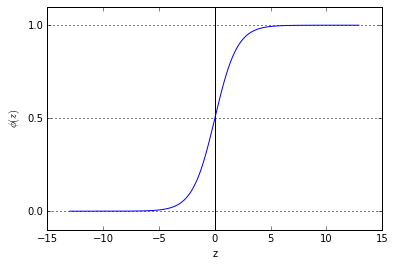

In [27]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-13, 13, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color = 'k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim([-0.1, 1.1])
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

그래프에서 확인 할 수 있는 것 처럼,     
$z$값이 0보다 클수록 1에 가까운 함수값을 갖고      
$z$값이 0보다 작을수록 0에 가까운 함수값을 갖는다는 것을 알 수 있다.    
즉 가중합 $w_0 x_0 + w_1 x_1 + \dots + w_p x_p=z$의 값에 따라 target값이 true일 확률($p$) 높거나 낮은 값을 갖는다는 것이다.

Chapter2에서 Perceptrons를 다루면서 등장했던 sign function(unit step function)과 그 역할이 유사한데,    
sigmoid 함수의 경우 미분이 매우 깔끔하게 나오는($\frac{dp}{dz} = p(1-p)$) 등 좋은 특성을 갖기 때문에 널리 사용된다.

---

로지스틱 회귀모형을 Neural network 관점에서 생각해보면    
앞서 다뤘던 Adaline에서 output layer의 activation function이     
$z$에 대한 선형 함수였던 것을 $z$에 대한 sigmoid 함수로 바꾼 것이라고 할 수 있다.

<img  src="./_images/03_adaline_w_sigmoid.PNG"/>

###### Learning the weights of the logistic cost function

$x$값들의 가중($w$)합을 이용해 $p$에 대한 예측 모형을 세울 수 있었다.   
그렇다면 어떤 방법으로 가중치($w$)들을 찾을 수 있을까?

Adaline에서는 최소화 하려는 함수(objective function)으로 아래와 같이         
예측값과 실제값의 차이 제곱합을 표현하는 cost function을 사용 했었다.    

$$\begin{align}
J(\mathbf{W}) &= \sum_{i} \frac{1}{2} \left( \hat{y}^{(i)} - y^{(i)} \right)^2 \\
&= \sum_{i} \frac{1}{2} \left( \phi(z^{(i)}) - y^{(i)} \right)^2
\end{align}$$

로지스틱 회귀에서는 조금 다른 방식으로 최소화 하려는 함수(objective function)를 만들게 된다.
모형의 예측값 $p^{(i)}$는 각 data sample의 target 값이 1일 예측 확률을 표현하므로       
$n$건의 데이터 sample들 중 target 값이 1(성공)인 sample에 대해서는 가능한 $p$가 1에 가까운 값으로     
target 값이 0(실패)인 sample에 대해서는 가능한 $p$가 0에 가까운 값으로 예측되면 더 좋은 모형이라 할 수 있다.

따라서 전체 $n$건의 sample을 잘 예측할 결합 확률을 아래와 같이 표현해볼 수 있다.

$$L(\mathbf{w}) = P(\mathbf{y} ~|~ \mathbf{x}; \mathbf{w}) = \prod_{i=1}^n P\left( y^{(i)} ~|~ x^{(i)}; \mathbf{w} \right) = \left( \phi(z^{(i)}) \right)^{y^{(i)}}\left( 1 - \phi(z^{(i)})\right)^{1-y^{(i)}}$$

결국 위 결합 확률이 최대가 된다면 좋은 모형이라 할 수 있다. 그런데 확률값($0 \leq p \leq 1$)들의 많은 곱이므로 연산 과정에서 underflow 문제가 발생할 수 있다. 또한 위 값을 크게만 하면 되기 때문에 전체 식에 $\mathrm{log}$를 취한 후 이 값이 최대가 되도록 하는 $\mathbf{w}$를 구하는 접근 방법을 취할 수 있다.($\mathrm{log}$함수의 단조증가 특성 때문)



$$l(\mathbf{w}) = \mathrm{log} ~ L(\mathbf{w}) = \sum_{i=1}^n 
~ y^{(i)} ~ \mathrm{log} \left( \phi(z^{(i)}) \right) 
~ + (1-y^{(i)}) ~ \mathrm{log} \left( 1 - \phi(z^{(i)})\right)$$

위 식을 최대화 하는 문제는 $-l(\mathbf{w})$를 최소화 하는 문제와 같으므로     
아래와 같은 cost function을 사용할 수 있다.   

$$\begin{align}
J(\mathbf{w}) &= -l(\mathbf{w}) \\
&= -\mathrm{log} ~ L(\mathbf{w}) \\
&= \sum_{i=1}^n 
 -y^{(i)} ~ \mathrm{log} \left( \phi(z^{(i)}) \right) 
~ - (1-y^{(i)}) ~ \mathrm{log} \left( 1 - \phi(z^{(i)})\right)
\end{align}$$

위 cost function이 어떤 의미인지 조금 생각보자.     
이를 위해 아래와 같이 단 하나의 sample에 대한 cost만을 생각해보면,  

$$J(\phi(z), y;\mathbf{w}) = -y ~ \mathrm{log} \left( \phi(z) \right) 
~ - (1-y) ~ \mathrm{log} \left( 1 - \phi(z)\right)$$

두 부분으로 구성되어 있는데 앞부분($-y ~ \mathrm{log} \left( \phi(z) \right) $)은 실제값이 1일때 예측값($0 \leq p \leq 1$)에 따른 cost를 나타내며,       
뒷부분($- (1-y) ~ \mathrm{log} \left( 1 - \phi(z)\right)$)은 실제값이 0일때 예측값($0 \leq p \leq 1$)에 따른 cost를 나타낸다.

즉 실제값과의 차이가 커질수록 cost도 증가함을 알 수 있다.

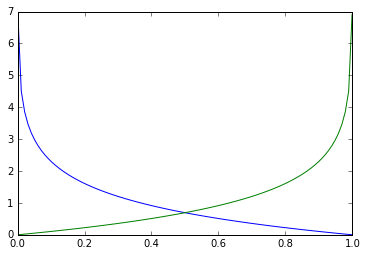

In [28]:
# Ploting cross-entropy(binary case)
def get_y_neg_log(x):  # cost when true output is 1
    return -1 * np.log(x)

def get_y_pos_log(x):  # cost when true output is 0
    return -1 * np.log(1-x)
# plot
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1/1000, 1 - 1/1000, 100)
y = [get_y_neg_log(i) for i in x]
d = [get_y_pos_log(i) for i in x]
plt.plot(x, y);
plt.plot(x, d);
plt.show()

###### Training a logistic regression model with scikit-learn

결국 최소화 할 cost function이 만들어졌고,        
Chapter2에서 다뤘다시피 gradient descent 등 다양한 방법을 통해        
$J(\mathbf{w})$를 최소화 하는 $\mathbf{w}$를 찾을 수 있다.

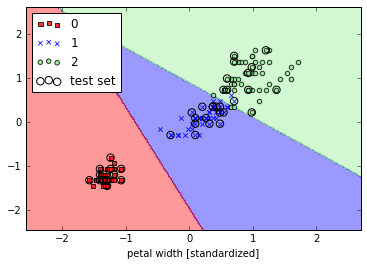

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)

lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.xlabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

실제 각 training sample에 대해 weight을 어떻게 수정하고 있는지를 계산해볼 수 있는데,   
자세한 내용은 text p64에서 확인 할 수 있다.    
결론만 소개하면 weight update rule은 아래와 같다.

$$w_j := w_j + \eta \sum_{i=1}^n \left( y^{(i)} - \phi( z^{(i)} )\right) x^{(i)}$$

###### Tackling overfitting via regularization

**overfitting**이란 training 데이터에만 잘 들어맞고,    
test data 등 새로운 데이터에는 예측력이 좋지 않은 모형의 상태를 말하며    
**high variance**라고 한다.

반면 모형이 매우 복잡도가 낮아서 training 데이터에 잘 들어맞지 않지만   
그렇다고 test data에 대한 성능이 training 데이터에서의 성능과    
크게 다르지 않는 모형의 상태를 **underfitting** 혹은 **high bias**라고 한다.




<img  src="./_images/03_bias_variance.PNG"/>

... 다음 시간에...

### Maximum margin classification with <u>support vector machines</u>

###### Maximum margin intuition

.

###### Dealing with the nonlinearly separable case using slack variables

.

###### Alternative implementation in scikit-learn

.

### Solving nonlinear problems using <u>kernel SVM</u>

###### Using the kernel trick to find separating hyperplanes in higher dimensional space

.

### <u>Decision tree learning</u>

###### Maximizing information gain - getting the most bang for the buck

.

###### Building a decision tree

.

###### Combining weak to strong learners via random forests

.

### K-nearest neighbors - a lazy learning algorithm

.